In [314]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)

In [504]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("The length of train set:", len(train_df))
print("The length of test set:", len(test_df))
train_df.head(20)
#1 represents disaster tweets while 0 represents non-disaster tweets

The length of train set: 7613
The length of test set: 3263


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [423]:
# identify missing values
print(train_df.isna().sum())
print(test_df.isna().sum()) # we do have missing value in feature "keyword" and "location" in both train and test set.

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


In [424]:
# sanity check for feature "keyword".
print(train_df["keyword"].unique())
print(test_df["keyword"].unique())
print("How many unique value in train keyword include nan: ", len(train_df["keyword"].unique())) # 221 unique values excludes nan value in train set.
print("How many unique value in test keyword include nan: ", len(test_df["keyword"].unique())) # 221 unique values excludes nan value in test set.
# it indicates train set and test set were probably splited from one single piece of data.

[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

In [505]:
# fix typos in keyword 
train_df['keyword'] = train_df["keyword"].str.replace('airplane%20accident', 'airplane accident')
train_df['keyword'] = train_df["keyword"].str.replace('blew%20up', 'blew up')
train_df['keyword'] = train_df["keyword"].str.replace('blown%20up', 'blown up')
train_df['keyword'] = train_df["keyword"].str.replace('body%20bag', 'body bagging')
train_df['keyword'] = train_df["keyword"].str.replace('body%20bagging', 'body bagging')
train_df['keyword'] = train_df["keyword"].str.replace('body%20bags', 'body bagging')
train_df['keyword'] = train_df["keyword"].str.replace('bridge%20collapse', 'bridge collapse')
train_df['keyword'] = train_df["keyword"].str.replace('buildings%20burning', 'buildings burning')
train_df['keyword'] = train_df["keyword"].str.replace('buildings%20on%20fire', 'buildings on fire')
train_df['keyword'] = train_df["keyword"].str.replace('burning%20buildings', 'burning buildings')
train_df['keyword'] = train_df["keyword"].str.replace('bush%20fires', 'bush fires')
train_df['keyword'] = train_df["keyword"].str.replace('chemical%20emergency', 'chemical emergency')
train_df['keyword'] = train_df["keyword"].str.replace('cliff%20fall', 'cliff fall')
train_df['keyword'] = train_df["keyword"].str.replace('emergency%20plan', 'emergency plan')
train_df['keyword'] = train_df["keyword"].str.replace('emergency%20services', 'emergency services')
train_df['keyword'] = train_df["keyword"].str.replace('fire%20truck', 'fire truck')
train_df['keyword'] = train_df["keyword"].str.replace('dust%20storm', 'dust storm')
train_df['keyword'] = train_df["keyword"].str.replace('first%20responders', 'first responders')
train_df['keyword'] = train_df["keyword"].str.replace('forest%20fire', 'forest fire')
train_df['keyword'] = train_df["keyword"].str.replace('forest%20fires', 'forest fires')
train_df['keyword'] = train_df["keyword"].str.replace('heat%20wave', 'heat wave')
train_df['keyword'] = train_df["keyword"].str.replace('loud%20bang', 'loud bang')
train_df['keyword'] = train_df["keyword"].str.replace('mass%20murder', 'mass murder')
train_df['keyword'] = train_df["keyword"].str.replace('mass%20murderer', 'mass murderer')
train_df['keyword'] = train_df["keyword"].str.replace('nuclear%20disaster', 'nuclear disaster')
train_df['keyword'] = train_df["keyword"].str.replace('nuclear%20reactor', 'nuclear reactor')
train_df['keyword'] = train_df["keyword"].str.replace('oil%20spill', 'oil spill')
train_df['keyword'] = train_df["keyword"].str.replace('radiation%20emergency', 'radiation emergency')
train_df['keyword'] = train_df["keyword"].str.replace('structural%20failure', 'structural failure')
train_df['keyword'] = train_df["keyword"].str.replace('suicide%20bomb', 'suicide bomb')
train_df['keyword'] = train_df["keyword"].str.replace('suicide%20bomber', 'suicide bomber')
train_df['keyword'] = train_df["keyword"].str.replace('suicide%20bombing', 'suicide bombing')
train_df['keyword'] = train_df["keyword"].str.replace('violent%20storm', 'suicide bomb')
train_df['keyword'] = train_df["keyword"].str.replace('war%20zone', 'war zone')
train_df['keyword'] = train_df["keyword"].str.replace('wild%20fires', 'wild fires')
train_df['keyword'] = train_df["keyword"].str.replace('natural%20disaster', 'natural disaster')

test_df['keyword'] = test_df["keyword"].str.replace('airplane%20accident', 'airplane accident')
test_df['keyword'] = test_df["keyword"].str.replace('blew%20up', 'blew up')
test_df['keyword'] = test_df["keyword"].str.replace('blown%20up', 'blown up')
test_df['keyword'] = test_df["keyword"].str.replace('body%20bag', 'body bagging')
test_df['keyword'] = test_df["keyword"].str.replace('body%20bagging', 'body bagging')
test_df['keyword'] = test_df["keyword"].str.replace('body%20bags', 'body bagging')
test_df['keyword'] = test_df["keyword"].str.replace('bridge%20collapse', 'bridge collapse')
test_df['keyword'] = test_df["keyword"].str.replace('buildings%20burning', 'buildings burning')
test_df['keyword'] = test_df["keyword"].str.replace('buildings%20on%20fire', 'buildings on fire')
test_df['keyword'] = test_df["keyword"].str.replace('burning%20buildings', 'burning buildings')
test_df['keyword'] = test_df["keyword"].str.replace('bush%20fires', 'bush fires')
test_df['keyword'] = test_df["keyword"].str.replace('chemical%20emergency', 'chemical emergency')
test_df['keyword'] = test_df["keyword"].str.replace('cliff%20fall', 'cliff fall')
test_df['keyword'] = test_df["keyword"].str.replace('emergency%20plan', 'emergency plan')
test_df['keyword'] = test_df["keyword"].str.replace('emergency%20services', 'emergency services')
test_df['keyword'] = test_df["keyword"].str.replace('fire%20truck', 'fire truck')
test_df['keyword'] = test_df["keyword"].str.replace('dust%20storm', 'dust storm')
test_df['keyword'] = test_df["keyword"].str.replace('first%20responders', 'first responders')
test_df['keyword'] = test_df["keyword"].str.replace('forest%20fire', 'forest fire')
test_df['keyword'] = test_df["keyword"].str.replace('forest%20fires', 'forest fires')
test_df['keyword'] = test_df["keyword"].str.replace('heat%20wave', 'heat wave')
test_df['keyword'] = test_df["keyword"].str.replace('loud%20bang', 'loud bang')
test_df['keyword'] = test_df["keyword"].str.replace('mass%20murder', 'mass murder')
test_df['keyword'] = test_df["keyword"].str.replace('mass%20murderer', 'mass murderer')
test_df['keyword'] = test_df["keyword"].str.replace('nuclear%20disaster', 'nuclear disaster')
test_df['keyword'] = test_df["keyword"].str.replace('nuclear%20reactor', 'nuclear reactor')
test_df['keyword'] = test_df["keyword"].str.replace('oil%20spill', 'oil spill')
test_df['keyword'] = test_df["keyword"].str.replace('radiation%20emergency', 'radiation emergency')
test_df['keyword'] = test_df["keyword"].str.replace('structural%20failure', 'structural failure')
test_df['keyword'] = test_df["keyword"].str.replace('suicide%20bomb', 'suicide bomb')
test_df['keyword'] = test_df["keyword"].str.replace('suicide%20bomber', 'suicide bomber')
test_df['keyword'] = test_df["keyword"].str.replace('suicide%20bombing', 'suicide bombing')
test_df['keyword'] = test_df["keyword"].str.replace('violent%20storm', 'suicide bomb')
test_df['keyword'] = test_df["keyword"].str.replace('war%20zone', 'war zone')
test_df['keyword'] = test_df["keyword"].str.replace('wild%20fires', 'wild fires')
test_df['keyword'] = test_df["keyword"].str.replace('natural%20disaster', 'natural disaster')

print(train_df["keyword"].unique())
print(test_df["keyword"].unique())

[nan 'ablaze' 'accident' 'aftershock' 'airplane accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew up' 'blight' 'blizzard'
 'blood' 'bloody' 'blown up' 'body bagging' 'body baggingging'
 'body baggings' 'bomb' 'bombed' 'bombing' 'bridge collapse'
 'buildings burning' 'buildings on fire' 'burned' 'burning'
 'burning buildings' 'bush fires' 'casualties' 'casualty' 'catastrophe'
 'catastrophic' 'chemical emergency' 'cliff fall' 'collapse' 'collapsed'
 'collide' 'collided' 'collision' 'crash' 'crashed' 'crush' 'crushed'
 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death' 'deaths' 'debris'
 'deluge' 'deluged' 'demolish' 'demolished' 'demolition' 'derail'
 'derailed' 'derailment' 'desolate' 'desolation' 'destroy' 'destroyed'
 'destruction' 'detonate' 'detonation' 'devastated' 'devastation'
 'disaster' 'displaced' 'drought' 'drown' 'dro

In [318]:
# sanity check for feature "location" 
print(train_df["location"].unique())
print(test_df["location"].unique())
print("How many unique value in train location include nan: ", len(train_df["location"].unique())) # 3341 unique values excludes nan value in train set.
print("How many unique value in test location include nan: ", len(test_df["location"].unique())) # 1603 unique values excludes nan value in test set.
# too many unique values in location.

[nan 'Birmingham' 'Est. September 2012 - Bristol' ... 'Vancouver, Canada'
 'London ' 'Lincoln']
[nan 'London' "Niall's place | SAF 12 SQUAD |" ...
 'Acey mountain islanddåÇTorontoåÈ' 'los angeles' 'Brussels, Belgium']
How many unique value in train location include nan:  3342
How many unique value in test location include nan:  1603


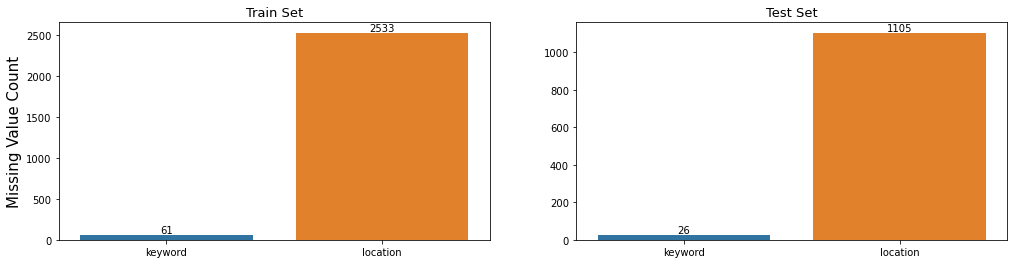

In [319]:
# visualisation for missing value in keyword and location.
fig, axes = plt.subplots(ncols=2, figsize=(17, 4))

ax = sns.barplot(x=train_df[["keyword", "location"]].isnull().sum(), y=train_df[["keyword", "location"]].isnull().sum().values, ax=axes[0])
ax1 = sns.barplot(x=test_df[["keyword", "location"]].isnull().sum(), y=test_df[["keyword", "location"]].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15)
axes[0].set_xticklabels(labels=["keyword", "location"])
axes[1].set_xticklabels(labels=["keyword", "location"])

axes[0].set_title('Train Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

ax.bar_label(ax.containers[0], fontsize=10);
ax1.bar_label(ax1.containers[0], fontsize=10);

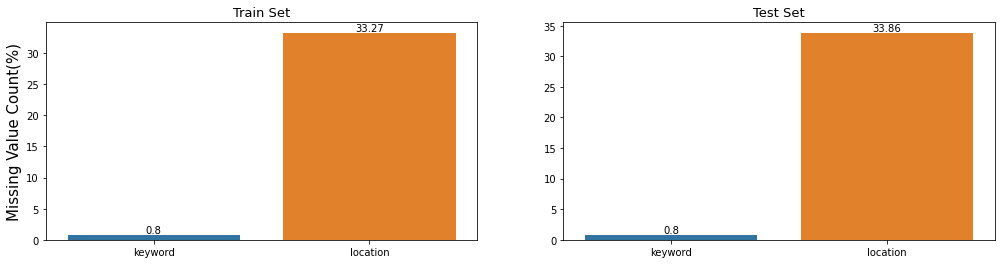

In [320]:
# visualisation for missing value in keyword and location in percentage, we found another evidence indicates were originally from one single piece of data.
fig, axes = plt.subplots(ncols=2, figsize=(17, 4))

ax = sns.barplot(x=train_df[["keyword", "location"]].isnull().sum(), y=train_df[["keyword", "location"]].isnull().mean().round(4)*100, ax=axes[0])
ax1 = sns.barplot(x=test_df[["keyword", "location"]].isnull().sum(), y=test_df[["keyword", "location"]].isnull().mean().round(4)*100, ax=axes[1])

axes[0].set_ylabel('Missing Value Count(%)', size=15)
axes[0].set_xticklabels(labels=["keyword", "location"])
axes[1].set_xticklabels(labels=["keyword", "location"])

axes[0].set_title('Train Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

ax.bar_label(ax.containers[0], fontsize=10);
ax1.bar_label(ax1.containers[0], fontsize=10);

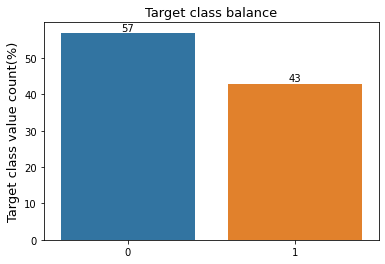

In [321]:
# class balance check shows we don't have severe class inbalance problem(57% vs 43%).
ax = sns.barplot(x=train_df["target"].value_counts().index, y=train_df["target"].value_counts(normalize=True).mul(100).round(1))
ax.set_title('Target class balance', fontsize=13)
ax.set_ylabel('Target class value count(%)', size=13)

ax.bar_label(ax.containers[0], fontsize=10);

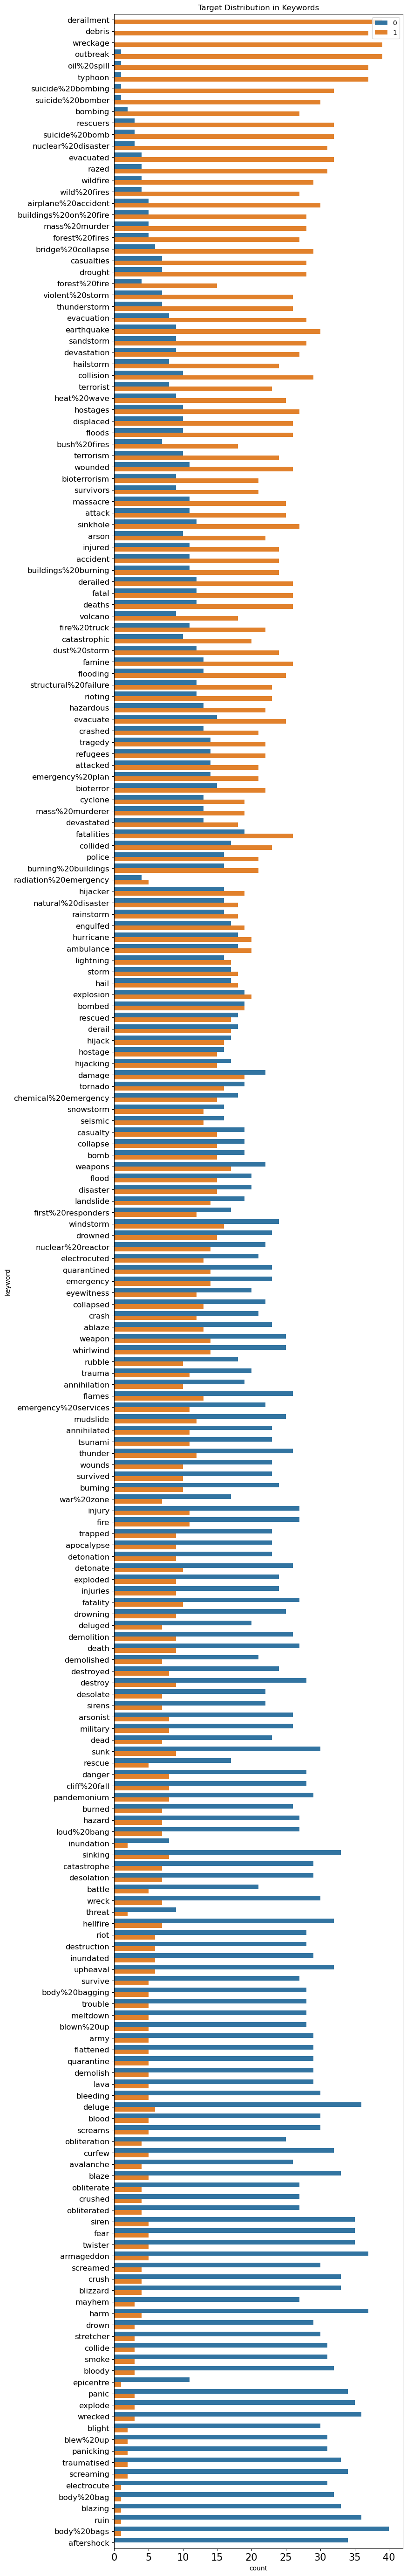

In [322]:
train_df['target_mean'] = train_df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train_df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train_df.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_df.drop(columns=['target_mean'], inplace=True)

In [493]:
#check the text by observation to decide what preprocess we can do, to reduce noise in the dataset.

# 1. we need to convert text to lowercase, transformer does it by itself.
# 2. remove urls to reduce the number of tokens
# 3. we have typos. e.g.FVCK > FUCK
# 4. we have words in other languages
# 5. remove punctuations
# 6. maybe remove digits
# 7. tokenisation, mapping and padding, which already did
# 8. Stemming and Lemmatization seems can reduce model performance, transformers will process it by itself.
# 9. remove high frequency words, transformer uses attention mechanism, 
#    it will look only on those words which will impact the output and not on words which are common in all data.
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [506]:
# remove urls

# Define a regex pattern to match URLs
url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    return url_pattern.sub('', text)

# Apply the function to the 'text' column and create a new column 'clean_text'
train_df['text'] = train_df['text'].apply(remove_urls)
test_df['text'] = test_df['text'].apply(remove_urls)
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [507]:
#remove punctuation
train_df["text"] = train_df["text"].replace(to_replace=r'[^\w\s]', value='', regex=True)
test_df["text"] = test_df["text"].replace(to_replace=r'[^\w\s]', value='', regex=True)
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orders in California,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1


In [508]:
# remove digits
train_df["text"] = train_df["text"].replace(to_replace=r'\d', value='', regex=True)
test_df["text"] = test_df["text"].replace(to_replace=r'\d', value='', regex=True)
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,people receive wildfires evacuation orders in California,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1


In [509]:
# text cleaning, remove any special characters left in text for training set.
train_df['text'] = train_df["text"].str.replace('  ', ' ')
train_df['text'] = train_df["text"].str.replace('ÛÓ', '')
train_df['text'] = train_df["text"].str.replace('ÛÒ', '')
train_df['text'] = train_df["text"].str.replace('Û_', '')
train_df['text'] = train_df["text"].str.replace('ã', '')
train_df['text'] = train_df["text"].str.replace('å', '')
train_df['text'] = train_df["text"].str.replace('Ûª', '')
train_df['text'] = train_df["text"].str.replace('ÌÑ', '')
train_df['text'] = train_df["text"].str.replace('å_', '')
train_df['text'] = train_df["text"].str.replace('Ìü', '')
train_df['text'] = train_df["text"].str.replace('Ç', '')
train_df['text'] = train_df["text"].str.replace('È', '')
train_df['text'] = train_df["text"].str.replace('âÂ', '')
train_df['text'] = train_df["text"].str.replace('Ê', '')
train_df['text'] = train_df["text"].str.replace('ÛÏ', '')
train_df['text'] = train_df["text"].str.replace('Û', '')
train_df['text'] = train_df["text"].str.replace('Ì', '')
train_df['text'] = train_df["text"].str.replace('N¼', '')

train_df['text'] = train_df["text"].str.replace('North CarolinaåÊAblaze', 'North Carolina Ablaze')
train_df['text'] = train_df["text"].str.replace('CanÛªt', 'cant')
train_df['text'] = train_df["text"].str.replace('AirplaneåÊ29072015', 'airplane 29072015')
train_df['text'] = train_df["text"].str.replace('ÛÏAirplaneÛ', 'airplane')
train_df['text'] = train_df["text"].str.replace('airplaneåÊ', 'airplane')
train_df['text'] = train_df["text"].str.replace('withåÊannihilation', 'with annihilatio')
train_df['text'] = train_df["text"].str.replace('Ûminimum wageÛª', 'minimum wage')
train_df['text'] = train_df["text"].str.replace('LetÛªs', 'Lets')
train_df['text'] = train_df["text"].str.replace('InterestRateRiseÛ', 'InterestRateRise')
train_df['text'] = train_df["text"].str.replace('griefÛª', 'grief')
train_df['text'] = train_df["text"].str.replace('Ûpolitics', 'politics')
train_df['text'] = train_df["text"].str.replace('tonightÛªs', 'tonights')
train_df['text'] = train_df["text"].str.replace('ÛÏHatchet', 'Hatchet')
train_df['text'] = train_df["text"].str.replace('ControlÛ', 'Control')
train_df['text'] = train_df["text"].str.replace('ÛAvalanche', 'Avalanche')
train_df['text'] = train_df["text"].str.replace('ÊFedEx', 'FedEx')
train_df['text'] = train_df["text"].str.replace('ÛThe', 'The')
train_df['text'] = train_df["text"].str.replace('ÛInstitute', 'Institute')
train_df['text'] = train_df["text"].str.replace('ÛÏParties', 'Parties')
train_df['text'] = train_df["text"].str.replace('drivingÛ', 'driving')
train_df['text'] = train_df["text"].str.replace('Ûbody', 'body')
train_df['text'] = train_df["text"].str.replace('killsÊone', 'kills one')
train_df['text'] = train_df["text"].str.replace('ÛÏWe', 'We')
train_df['text'] = train_df["text"].str.replace('MittÛ', 'Mitt')
train_df['text'] = train_df["text"].str.replace('amp', 'and')
train_df['text'] = train_df["text"].str.replace('ÛÏThe', 'The')
train_df['text'] = train_df["text"].str.replace('casualtiesÛ', 'casualties')
train_df['text'] = train_df["text"].str.replace('Ûamino', 'amino')
train_df['text'] = train_df["text"].str.replace('HighÛ', 'High')
train_df['text'] = train_df["text"].str.replace('EntertainerÛ', 'Entertainer')
train_df['text'] = train_df["text"].str.replace('WallÛ', 'Wall')
train_df['text'] = train_df["text"].str.replace('ÛÏYou', 'You')
train_df['text'] = train_df["text"].str.replace('WarnedÛ', 'Warned')
train_df['text'] = train_df["text"].str.replace('MarketingÊMediocrity', 'Marketing Mediocrity')
train_df['text'] = train_df["text"].str.replace('ÛÏHannaPHÛ', 'Hanna')
train_df['text'] = train_df["text"].str.replace('Ûfirst', 'first')
train_df['text'] = train_df["text"].str.replace('Ûsecond', 'second')
train_df['text'] = train_df["text"].str.replace('VRAÛ', '')
train_df['text'] = train_df["text"].str.replace('RÌunion', 'union')
train_df['text'] = train_df["text"].str.replace('ÛÏAfter', 'After')
train_df['text'] = train_df["text"].str.replace('ÛDemolition', 'Demolition')
train_df['text'] = train_df["text"].str.replace('ÛIts', 'Its')
train_df['text'] = train_df["text"].str.replace('ÛÏRichmond', 'Richmond')
train_df['text'] = train_df["text"].str.replace('ÛÏLove', 'Love')
train_df['text'] = train_df["text"].str.replace('mÌ¼sica', '')
train_df['text'] = train_df["text"].str.replace('ÛDevastated', 'Devastated')
train_df['text'] = train_df["text"].str.replace('Ûim', 'im')
train_df['text'] = train_df["text"].str.replace('disasterÛ', 'disaster')
train_df['text'] = train_df["text"].str.replace('Ûhoax', 'hoax')
train_df['text'] = train_df["text"].str.replace('Ûexceptional', 'exceptional')
train_df['text'] = train_df["text"].str.replace('presidentÛ', 'president')
train_df['text'] = train_df["text"].str.replace('ÛBomb', 'Bomb')
train_df['text'] = train_df["text"].str.replace('ÛÏA', 'A')
train_df['text'] = train_df["text"].str.replace('timeÛ', 'time')
train_df['text'] = train_df["text"].str.replace('ÛÏA', 'A')
train_df['text'] = train_df["text"].str.replace('BoyÛ', 'Boy')
train_df['text'] = train_df["text"].str.replace('Ûfood', 'food')
train_df['text'] = train_df["text"].str.replace('ÛWe', 'We')
train_df['text'] = train_df["text"].str.replace('ÛBadges', 'Badges')
train_df['text'] = train_df["text"].str.replace('Ûill', 'will')
train_df['text'] = train_df["text"].str.replace('sayÛ', 'say')
train_df['text'] = train_df["text"].str.replace('youÛ', 'you')
train_df['text'] = train_df["text"].str.replace('Ûhazard', 'hazard')
train_df['text'] = train_df["text"].str.replace('ÛHeat', 'Heat')
train_df['text'] = train_df["text"].str.replace('ÛIt', 'It')
train_df['text'] = train_df["text"].str.replace('Ûplot', 'plot')
train_df['text'] = train_df["text"].str.replace('ÛHijacker', 'Hijacker')
train_df['text'] = train_df["text"].str.replace('cafÌ', 'caf')
train_df['text'] = train_df["text"].str.replace('ÛGood', 'Good')
train_df['text'] = train_df["text"].str.replace('ÛRansomware', 'Ransomware')
train_df['text'] = train_df["text"].str.replace('ÛMuslim', 'Muslim')
train_df['text'] = train_df["text"].str.replace('RaÌ¼l', 'Ra')
train_df['text'] = train_df["text"].str.replace('Japan', 'Jap')
train_df['text'] = train_df["text"].str.replace('vÌ_deo', 'video')
train_df['text'] = train_df["text"].str.replace('SuruÌ', 'Suruc')
train_df['text'] = train_df["text"].str.replace('Ra¼l', 'Ra')
train_df['text'] = train_df["text"].str.replace('DISASTEREOficial', 'DISASTER Official')
train_df['text'] = train_df["text"].str.replace('NitClub', 'Nightclub')
train_df['text'] = train_df["text"].str.replace('m¼sica', 'sica')

In [510]:
# check any text with non English word for train set
from string import printable

for idx, x in enumerate(train_df["text"]):
    if set(x).difference(printable):
        print(idx, x)

In [513]:
# text cleaning, remove any special characters left in text for test set.
test_df['text'] = test_df["text"].str.replace('  ', ' ')
test_df['text'] = test_df["text"].str.replace('ÛÓ', '')
test_df['text'] = test_df["text"].str.replace('ÛÒ', '')
test_df['text'] = test_df["text"].str.replace('Û_', '')
test_df['text'] = test_df["text"].str.replace('ã', '')
test_df['text'] = test_df["text"].str.replace('å', '')
test_df['text'] = test_df["text"].str.replace('Ûª', '')
test_df['text'] = test_df["text"].str.replace('ÌÑ', '')
test_df['text'] = test_df["text"].str.replace('å_', '')
test_df['text'] = test_df["text"].str.replace('Ìü', '')
test_df['text'] = test_df["text"].str.replace('Ç', '')
test_df['text'] = test_df["text"].str.replace('È', '')
test_df['text'] = test_df["text"].str.replace('âÂ', '')
test_df['text'] = test_df["text"].str.replace('Ê', '')
test_df['text'] = test_df["text"].str.replace('ÛÏ', '')
test_df['text'] = test_df["text"].str.replace('Û', '')
test_df['text'] = test_df["text"].str.replace('Ì', '')
test_df['text'] = test_df["text"].str.replace('N¼', '')
test_df['text'] = test_df["text"].str.replace('ááá', '')
test_df['text'] = test_df["text"].str.replace('â', '')
test_df['text'] = test_df["text"].str.replace('¼', '')

test_df['text'] = test_df["text"].str.replace('MakinwaÛªs', 'Makinwas')
test_df['text'] = test_df["text"].str.replace('IÛªm', 'Im')
test_df['text'] = test_df["text"].str.replace('ablazeÛ_', 'ablaze')
test_df['text'] = test_df["text"].str.replace('ZeroEdgeå', 'ZeroEdge')
test_df['text'] = test_df["text"].str.replace('GrÌ_nberg', 'Grinberg')
test_df['text'] = test_df["text"].str.replace('DäJ VUUUUU', 'DEJA VU')
test_df['text'] = test_df["text"].str.replace('À', '')

In [514]:
# check any text with non English word for test set
from string import printable

for idx, x in enumerate(test_df["text"]):
    if set(x).difference(printable):
        print(idx, x)

2739 Pic of yr old PKK suicide bomber who detonated bomb in Turkey Army trench released Harun àekdar a member o 
2745 Pic of yr old PKK suicide bomber who detonated bomb in Turkey Army trench released Harun àekdar a member o 
2834 See the comment from yogal on thejournal_ieLä Niamh leads search for survivors of capsized migrant boat 
3255 See the yr old PKK suicide bomber who detonated bomb in Turkey Army trench released Harun àekdar MsOreo_


In [515]:
test_df.iloc[0:150]

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities stay safe everyone
2,3,NaN,NaN,there is a forest fire at spot pond geese are fleeing across the street I cannot save them all
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills in China and Taiwan
5,12,NaN,NaN,Were shakingIts an earthquake
6,21,NaN,NaN,Theyd probably still show more life than Arsenal did yesterday eh EH
7,22,NaN,NaN,Hey How are you
8,27,NaN,NaN,What a nice hat
9,29,NaN,NaN,Fuck off
